In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
df=pd.read_csv('AMES_Final_DF.csv')

In [23]:
df.head()

,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,...,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
0,141.0,31770,6,5,1960,1960,112.0,639.0,0.0,441.0,...,0,0,0,0,1,0,0,0,1,0
1,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,270.0,...,0,0,0,0,1,0,0,0,1,0
2,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,406.0,...,0,0,0,0,1,0,0,0,1,0
3,93.0,11160,7,5,1968,1968,0.0,1065.0,0.0,1045.0,...,0,0,0,0,1,0,0,0,1,0
4,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,137.0,...,0,0,0,0,1,0,0,0,1,0


In [24]:
df.columns

Index(['Lot Frontage', 'Lot Area', 'Overall Qual', 'Overall Cond',
       'Year Built', 'Year Remod/Add', 'Mas Vnr Area', 'BsmtFin SF 1',
       'BsmtFin SF 2', 'Bsmt Unf SF',
       ...
       'Sale Type_ConLw', 'Sale Type_New', 'Sale Type_Oth', 'Sale Type_VWD',
       'Sale Type_WD ', 'Sale Condition_AdjLand', 'Sale Condition_Alloca',
       'Sale Condition_Family', 'Sale Condition_Normal',
       'Sale Condition_Partial'],
      dtype='object', length=274)

In [25]:
df.corr()['SalePrice'].sort_values()

Exter Qual_TA       -0.591459
Kitchen Qual_TA     -0.527461
Fireplace Qu_None   -0.481740
Bsmt Qual_TA        -0.453022
Garage Finish_Unf   -0.422363
                       ...   
Garage Cars          0.648488
Total Bsmt SF        0.660983
Gr Liv Area          0.727279
Overall Qual         0.802637
SalePrice            1.000000
Name: SalePrice, Length: 274, dtype: float64

In [26]:
x=df.drop('SalePrice',axis=1)
y=df['SalePrice']

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [28]:
from sklearn.linear_model import LinearRegression
l_model=LinearRegression()
l_model.fit(x_train,y_train)
l_model_pred=l_model.predict(x_test)
l_model_xpred=l_model.predict(x_train)

In [29]:
test_residual_error=y_test-l_model_pred

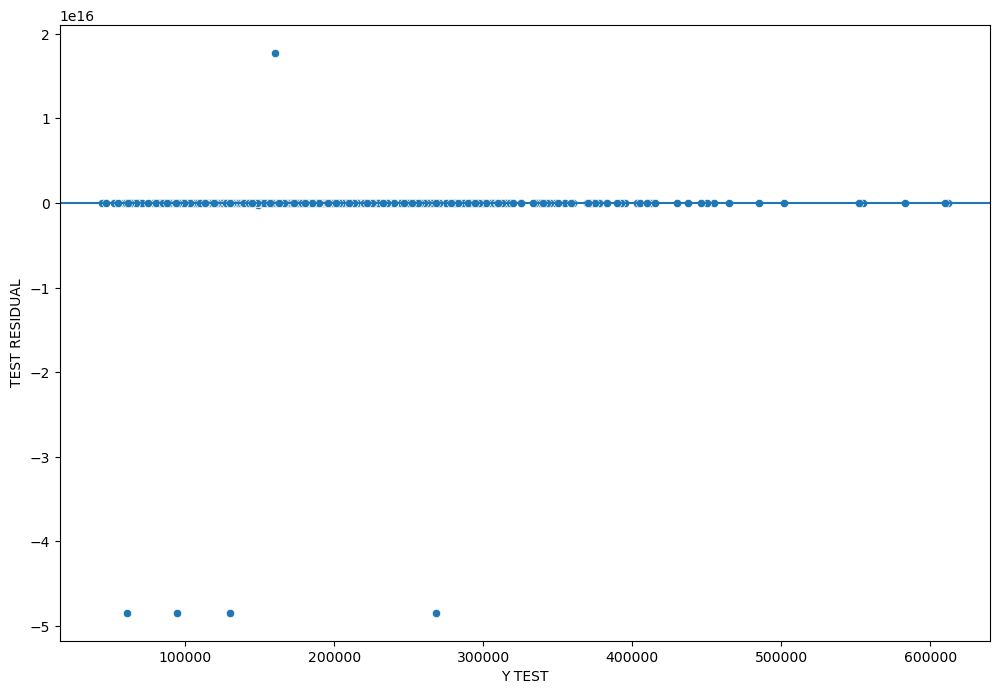

In [30]:
plt.figure(figsize=(12,8),dpi=100)
sns.scatterplot(x=y_test,y=test_residual_error)
plt.axhline(y=0)
plt.xlabel('Y TEST')
plt.ylabel('TEST RESIDUAL')
plt.show()

In [31]:
from sklearn.metrics import mean_squared_error
rmse=np.sqrt(mean_squared_error(y_test,l_model_pred))
rmse

3323783241102145.0

In [32]:
from sklearn.linear_model import ElasticNetCV
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
enc=ElasticNetCV()
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)
p_m={'l1_ratio':[.1,.2,.89,.45,.99,.98],'n_alphas':[1,10,100,100]}
gn=GridSearchCV(estimator=enc,param_grid=p_m,scoring='neg_mean_squared_error',cv=10,verbose=1)
gn.fit(x_train,y_train)
g_pred=gn.predict(x_test)
g_pred

Fitting 10 folds for each of 24 candidates, totalling 240 fits


array([138125.80036975, 402980.94104558, 206672.01484792, 204090.76314044,
       136193.58682321, 182065.82559126,  89595.89201698, 159089.60800709,
       124954.76157519, 189013.47856652, 126962.95763071, 234517.45398209,
       178593.11752656, 334139.94193238, 147847.61460144, 161625.74817843,
       111381.46061878, 235239.70251448, 193298.68455169, 144826.94024982,
       130168.65182255, 154933.14396919, 135963.27669559, 239273.33875165,
       156702.85460132, 256106.42240542, 158736.09642798, 162743.41785481,
       147595.69669726, 187008.36849478, 258185.6095058 ,  45433.44356891,
       167244.98929739, 125450.55551106, 237727.49240392, 115672.36257157,
       232037.07425574, 156248.54710107, 163329.57772999, 235599.6334383 ,
       135474.6269575 , 264950.23484345, 144961.91885281, 120704.61951779,
       222889.76839753, 196469.21740991,  72251.08408978, 169718.86420534,
        70540.25738376, 114713.45807392, 210468.30755206, 308128.39690434,
       239990.66656963, 1

In [33]:
fen=ElasticNetCV(l1_ratio=0.99,alphas=[10])
fen.fit(x_train,y_train)
fen_pred=fen.predict(x_test)

In [34]:
rmse=np.sqrt(mean_squared_error(y_test,fen_pred))
rmse

21313.0100110354

In [35]:
final_model=ElasticNetCV(l1_ratio=0.99,alphas=[10])
final_model.fit(x,y)
final_pred=final_model.predict(x)

In [36]:
from sklearn.metrics import mean_squared_error
rmse=np.sqrt(mean_squared_error(y,final_pred))
rmse

23482.605969092187

In [37]:
final_model.coef_

array([ 1.04810061e+02,  5.22230981e-01,  1.11172612e+04,  5.82014805e+03,
        4.28933244e+02,  1.59811337e+02,  4.21227147e+01,  3.88339671e+01,
        2.66840889e+01,  1.54760498e+01,  1.04967821e+01,  4.99105824e+01,
        5.67671582e+01,  1.90466029e+01,  1.00999222e+01, -0.00000000e+00,
       -1.12322985e+03, -7.94420677e+02,  3.98504414e+02, -5.94246251e+03,
       -4.70012846e+03, -3.85977376e+01,  2.43857144e+03, -3.54166174e+00,
        1.12825800e+03,  2.71822461e+01,  1.41850924e+01,  8.91554610e+00,
        1.11588548e+01, -6.04968936e+00,  4.50842195e+01,  3.77956118e+01,
       -3.92932703e-01,  4.01677597e+00, -5.49626823e+02, -5.10758939e+01,
       -2.30251825e+03, -0.00000000e+00, -1.69486167e+03,  2.15001199e+03,
        2.71099553e+03,  0.00000000e+00,  5.94232816e+02,  7.73214465e+02,
        1.47861374e+03,  1.29684381e+03, -1.97084989e+02,  0.00000000e+00,
        4.68836236e+02, -3.25341610e+03, -1.42625270e+02,  6.33563544e+02,
        0.00000000e+00, -

In [38]:
from joblib import load,dump
dump(final_model,'Final_Housing_model')

['Final_Housing_model']